In [539]:
from sympy import *
from sympy.physics.hep.gamma_matrices import GammaMatrix as G, LorentzIndex, gamma_trace
from sympy.tensor.tensor import tensor_indices
from sympy.physics.hep.gamma_matrices import kahane_simplify
from sympy.physics.matrices import mgamma
from einsteinpy.symbolic.predefined import Schwarzschild 
from einsteinpy.symbolic import ChristoffelSymbols, RiemannCurvatureTensor, Tensor, BaseRelativityTensor, GenericVector, MetricTensor
from sympy.tensor.toperators import PartialDerivative
from sympy.tensor.tensor import TensorIndexType, TensorIndex, TensorHead, tensor_indices
import numpy as np
from fractions import Fraction

#i,j = tensor_indices('i,j', LorentzIndex)
init_printing(use_unicode=True)
f, theta, phi, u_0, t, c, hbar, m_ = symbols("f theta phi u_0 t c hbar m", real=True)


r = symbols("r", positive=True)
r_s,M ,R= symbols("r_s M R")
u_t , u_r , u_theta, u_phi = symbols("u_t u_r u_\\theta u_\phi", cls=Function)

Lorentz = TensorIndexType('Lorentz', dummy_name='Lorentz')
Global = TensorIndexType('Global', dummy_name='Global')
Fermi = TensorIndexType('Fermi', dummy_name='Fermi')
Dirac = TensorIndexType('Dirac', dummy_name="Dirac")

#a, b, c, d = tensor_indices('a b c d', Lorentz)
alpha, beta, mu, nu, rho= tensor_indices('alpha beta mu nu rho', Global)
i,j,k,l,m = tensor_indices("i j k l m", Fermi)
A,B,C,D,E = tensor_indices("A B C D E", Dirac)

f,r,theta, phi, hbar

In [544]:
f = (1-r_s/r)
g_t = -f
g_r = 1/f
g_theta = r**2
g_phi = r**2 * sin(theta)**2

g = Matrix([[g_t, 0,0,0],[0,g_r,0,0],[0,0,g_theta,0],[0,0,0,g_phi]])
g_ = MetricTensor(g.tolist(),syms=[t,r,theta,phi], config='ll', name="ss-metric") 
ch = ChristoffelSymbols.from_metric(g_)
ch = ch.change_config("ull")
ch.tensor()

⎡                                        ⎡   ⎛1    rₛ⎞                        
⎢                                        ⎢rₛ⋅⎜─ - ───⎟                        
⎢                                        ⎢   ⎝2   2⋅r⎠                        
⎢                                        ⎢────────────        0               
⎢⎡                     -rₛ            ⎤  ⎢      2                             
⎢⎢      0         ──────────────  0  0⎥  ⎢     r                              
⎢⎢                   2 ⎛     rₛ⎞      ⎥  ⎢                                    
⎢⎢                2⋅r ⋅⎜-1 + ──⎟      ⎥  ⎢                  ⎛1    rₛ⎞         
⎢⎢                     ⎝     r ⎠      ⎥  ⎢              -rₛ⋅⎜─ - ───⎟         
⎢⎢                                    ⎥  ⎢                  ⎝2   2⋅r⎠         
⎢⎢     -rₛ                            ⎥  ⎢     0        ──────────────        
⎢⎢──────────────        0         0  0⎥  ⎢                          2         
⎢⎢   2 ⎛     rₛ⎞                      ⎥  ⎢          

In [ ]:
#defining Killing-Yano tensor "Matrix"

f_ = Matrix(
    [
        [0,0,0,0],
        [0,0,0,0],
        [0,0,0,r**3 *sin(theta) ],
        [0,0,-r**3 * sin(theta),0]])
f_

⎡0  0      0           0    ⎤
⎢                           ⎥
⎢0  0      0           0    ⎥
⎢                           ⎥
⎢                   3       ⎥
⎢0  0      0       r ⋅sin(θ)⎥
⎢                           ⎥
⎢        3                  ⎥
⎣0  0  -r ⋅sin(θ)      0    ⎦

In [ ]:
#from matrix to tensors

eta = Matrix([[-1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

repl = {}
repl[Lorentz] = eta.tolist()
repl[Global] = g_.tensor().tolist()
repl[Fermi] = eta.tolist() #this only correct along the geodesic

Gamma = TensorHead('Gamma', [Global, Global, Global]) #the christoffel symbol
minkowski_m = TensorHead('eta', [Lorentz, Lorentz])
schwarzschild_m = TensorHead('g', [Global, Global])
KY = TensorHead("f", [Global, Global]) #Killin-Yano tensor
x = TensorHead('x', [Global])

repl[x(mu)] = [t, r, theta, phi]
repl[minkowski_m(-a, -b)] = eta.tolist()
repl[schwarzschild_m(-mu, -nu)] = g_.tensor().tolist()
repl[Gamma(alpha, -mu, -nu)] = ch.tensor().tolist()
repl[KY(-alpha, -beta)] = f_.tolist()


# verifying Killing-eq

$$\nabla_{\rho} f_{\mu \nu} + \nabla_{\nu} f_{\mu \rho} = 0$$
$$\partial_{\rho} f_{\mu \nu} + \partial_{\nu} f_{\mu \rho} - \Gamma^\alpha_{\rho \mu}f_{\alpha \nu} - \Gamma^\alpha_{\nu \mu}f_{\alpha \rho} - 2*\Gamma^\alpha_{\rho \nu}f_{\mu \alpha} = 0$$

In [ ]:
Keq = PartialDerivative(KY(-mu, -nu), x(rho)) + PartialDerivative(KY(-mu, -rho), x(nu)) - Gamma(alpha,-rho,-mu)*KY(-alpha,-nu) - Gamma(alpha, -nu, -mu)*KY(-alpha, -rho) + 2*Gamma(alpha,-rho,-nu)*KY(-alpha,-mu) 
simplify(Keq.replace_with_arrays(repl, Keq.get_free_indices()))

⎡⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤⎤
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎣⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦⎦

# finding first tetraed

$L^\mu = f^\mu_{\ \ \ \nu} u^\nu$

In [ ]:
u = TensorHead('u', [Global])
#u_t, u_r, u_theta, u_phi = symbols("u_t u_r u_theta u_phi", real = True, positive=True)
u_t = u_t(r)
u_r = u_r(r)
u_phi = u_phi(r)
repl[u(mu)] = [u_t, u_r, 0 ,u_phi]
L = KY(mu,-nu)*u(nu)
Norm_L = L(alpha)*L(-alpha)
Norm_value = Norm_L.replace_with_arrays(repl, [])
#therefore
e_2 = L/sqrt(Norm_value)
simplify(e_2.replace_with_arrays(repl, [mu])).subs(theta, pi/2)

/tmp/ipykernel_1552/1227335532.py:8: SymPyDeprecationWarning: 

Calling a tensor like Tensor(*indices) is deprecated. Use
Tensor.substitute_indices() instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-tensor-fun-eval
for details.

This has been deprecated since SymPy version 1.5. It
will be removed in a future version of SymPy.

  Norm_L = L(alpha)*L(-alpha)


⎡          u_\phi(r)       ⎤
⎢0  0  ─────────────────  0⎥
⎢           ____________   ⎥
⎢          ╱       2       ⎥
⎣      r⋅╲╱  u_\phi (r)    ⎦

In [ ]:
e_1 = TensorHead('e_1', [Global])
L = Symbol("L", positive=True) #anuglar momentum
e_3 = TensorHead('e_3', [Global])
const = (r**2 + L**2)/(r**2 * L)

N_1 = sqrt(1+ L**2/r**2)
N_3 = sqrt(1 + r**2/L**2)


repl[e_1(mu)] = [u_r/(f*N_1), u_t*f/N_1, 0,0]
repl[e_3(mu)] = [u_t/N_3, u_r/N_3, 0,const/N_3]

In [ ]:
simplify((e_3(mu)).replace_with_arrays(repl, [mu]).subs(theta,pi/2).subs(u_r, sqrt(2*Energy +  2*M/r - L**2/r**2 + 2*M*L**2/r**3)).subs(u_t, r*sqrt(2*Energy + 1)*sqrt(1/(4*M**2 - 4*M*r + r**2))).subs(r_s, 2*M)).subs(L,0)

⎡         1⎤
⎢0  0  0  ─⎥
⎣         r⎦

$$u^\mu \partial_\mu \Psi = u^\mu\left(-e_3^\nu \partial_\mu e_{1\nu} + e_3^\nu \Gamma^\alpha_{\mu\nu}e_{1\alpha}\right)$$

In [ ]:
#expr = u(mu)*(-e_3(nu)*PartialDerivative(e_1(-nu), x(mu)) + e_3(nu)*Gamma(alpha, -nu, -mu)*e_1(-alpha))
expr = u(mu)*(-e_1(nu)*PartialDerivative(e_3(-nu), x(mu)) + e_1(nu)*Gamma(alpha, -nu, -mu)*e_3(-alpha))
F = simplify(expr.replace_with_arrays(repl, []).subs(r_s, 2*M).subs(theta, pi/2).subs(u_phi, L/r**2)/u_r)

In [ ]:
Energy = Symbol("E", positive=True)

F = simplify(F.subs(theta,pi/2).subs(u_phi, L/r**2).subs(u_r, sqrt(2*Energy +  2*M/r - L**2/r**2 + 2*M*L**2/r**3)).subs(u_t, r*sqrt(2*Energy + 1)*sqrt(1/(4*M**2 - 4*M*r + r**2))).subs(r_s, 2*M))

In [ ]:
simplify(F.subs(L,0))

In [ ]:
u_val = u(mu).replace_with_arrays(repl, [mu])
e_1_val = e_1(mu).replace_with_arrays(repl, [mu])
e_2_val = [0,0,1/r,0]
e_3_val = e_3(mu).replace_with_arrays(repl,[mu])


In [ ]:
#u_val = simplify(u_val.subs(theta,pi/2).subs(u_phi, L/r**2).subs(u_r, sqrt(2*Energy +  2*M/r - L**2/r**2 + 2*M*L**2/r**3)).subs(u_t, r*sqrt(2*Energy + 1)*sqrt(1/(4*M**2 - 4*M*r + r**2))).subs(r_s, 2*M))
#e_1_val = simplify(e_1_val.subs(theta,pi/2).subs(u_phi, L/r**2).subs(u_r, sqrt(2*Energy +  2*M/r - L**2/r**2 + 2*M*L**2/r**3)).subs(u_t, r*sqrt(2*Energy + 1)*sqrt(1/(4*M**2 - 4*M*r + r**2))).subs(r_s, 2*M))
#e_3_val = simplify(e_3_val.subs(theta,pi/2).subs(u_phi, L/r**2).subs(u_r, sqrt(2*Energy +  2*M/r - L**2/r**2 + 2*M*L**2/r**3)).subs(u_t, r*sqrt(2*Energy + 1)*sqrt(1/(4*M**2 - 4*M*r + r**2))).subs(r_s, 2*M))

In [560]:
#defining the vierbein
tetraed = TensorHead("e", [Fermi, Global])

psi = symbols("Psi", cls=Function)
psi = psi(r)

repl[tetraed(-i, mu)] = [
    u_val.tolist(),
    (e_1_val*cos(psi) - e_3_val*sin(psi)).tolist(),
    e_2_val,
    (e_3_val*sin(psi) + e_3_val*cos(psi)).tolist()
]

In [ ]:
Riemann = TensorHead("R", [Global, Global, Global, Global])
rieman = RiemannCurvatureTensor.from_metric(g_)
rieman.tensor()

repl[Riemann(-mu, -nu, -alpha, -beta)] = rieman.change_config('llll').tensor().tolist()


In [ ]:
R_in_fermi = Riemann(-mu,-nu,-alpha, -beta)*tetraed(-i,mu)*tetraed(-j,nu)*tetraed(-k,alpha)*tetraed(-l,beta)
R_in_fermi = R_in_fermi.replace_with_arrays(repl, [-i,-j,-k,-l])

KeyboardInterrupt: 

In [ ]:
Fermi_spacial = TensorIndexType('Fermi_spacial', dummy_name='Fermi_S')
iS,jS,kS,lS,mS = tensor_indices("i j k l m", Fermi_spacial)

x_,y_,z_ = symbols("x y z")

x = TensorHead('x', [Fermi_spacial])
gamma = TensorHead("gamma", [Fermi_spacial, Dirac, Dirac])

R_1 = TensorHead("Rie", [Fermi_spacial, Fermi_spacial])
R_2 = TensorHead("Rie", [Fermi_spacial, Fermi_spacial, Fermi_spacial])
R_3 = TensorHead("Rie", [Fermi_spacial, Fermi_spacial, Fermi_spacial])
R_4 = TensorHead("Rie", [Fermi_spacial, Fermi_spacial, Fermi_spacial, Fermi_spacial])

gamma_0 = TensorHead("gamma0", [Dirac, Dirac])


spinor = TensorHead("Psi", [Dirac])
spinor_bar = TensorHead("Psi_bar", [Dirac])

repl_spacial = {}
repl_spacial[Fermi_spacial] = eye(3).tolist()
repl_spacial[x(iS)] = [x_,y_,z_]

repl_spacial[gamma(iS,A,-B)] = [mgamma(1).tolist(), mgamma(2).tolist(), mgamma(3).tolist()]
repl_spacial[gamma_0(A,-B)] = mgamma(0).tolist()
repl_spacial[spinor(A)] = [1,0,0,0]
repl_spacial[spinor_bar(-A)] = (Matrix([1,0,0,0]).T@mgamma(0)).tolist()[0]

repl_spacial[R_1(-jS,-mS)] = R_in_fermi[1:4,0,0,1:4].tolist()
repl_spacial[R_2(-kS, -jS, -mS)] = R_in_fermi[1:4,1:4,0,1:4].tolist()
repl_spacial[R_3(-jS, -iS, -mS)] = R_in_fermi[0,1:4, 1:4, 1:4].tolist()
repl_spacial[R_4(-kS, -jS, -iS, -mS)] = R_in_fermi[1:4, 1:4, 1:4, 1:4].tolist()

In [ ]:
v_0 = spinor_bar(-A)*(1/2 * gamma_0(A,-B)*gamma(-jS, B,-C)*R_1(jS,-mS)*x(mS) + 1/4 * gamma(-kS,A,-B)*gamma(-jS,B,-C)*R_2(kS,jS,-mS)*x(mS) )*spinor(C)
v_0 = simplify((v_0.replace_with_arrays(repl_spacial,v_0.get_free_indices())).subs(theta,pi/2).subs(u_phi(r), L/r**2).subs(u_r(r), sqrt(2*Energy +  2*M/r - L**2/r**2 + 2*M*L**2/r**3)).subs(u_t(r), r*sqrt(2*Energy + 1)*sqrt(1/(4*M**2 - 4*M*r + r**2))).subs(r_s, 2*M))

TypeError: gamma takes exactly 1 argument (3 given)

In [ ]:
v_0.subs(y,0)

In [ ]:
def rationalize_coeffs(expr):
    for i in expr.atoms(Float):
        r = Rational(str(i)).limit_denominator(1000)
        expr = expr.subs(i, r)
    return expr 

In [ ]:
v_i = spinor_bar(-A)*(frac(1/4) * gamma_0(A,-B)*gamma(-jS, B,-C)*R_3(jS,-iS,-mS)*x(mS) + frac(1/8) * gamma(-kS,A,-B)*gamma(-jS,B,-C)*R_4(kS,jS,-iS,-mS)*x(mS) )*spinor(C)
v_i = simplify((v_i.replace_with_arrays(repl_spacial,v_i.get_free_indices())).subs(theta,pi/2).subs(u_phi(r), L/r**2).subs(u_r(r), sqrt(2*Energy +  2*M/r - L**2/r**2 + 2*M*L**2/r**3)).subs(u_t(r), r*sqrt(2*Energy + 1)*sqrt(1/(4*M**2 - 4*M*r + r**2))).subs(r_s, 2*M))
v_i

⎡                                                                             
⎢            ⎛                                                                
⎢            ⎜        ⎛                                     __________________
⎢            ⎜   2  2 ⎜   2   _________              3/2   ╱      3      2    
⎢-0.25⋅ⅈ⋅M⋅y⋅⎝- L ⋅r ⋅⎝L⋅r ⋅╲╱ 2⋅E + 1 ⋅sin(Ψ(r)) - r   ⋅╲╱  2⋅E⋅r  + 2⋅L ⋅M -
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎣                                                                             

                                                                              
                          2                                                   
_______________          ⎞       ⎛          _________________________________ 
  2          2           ⎟     2 ⎜   3/2   ╱      3

In [ ]:
v_i.subs(y_,0).subs(x_,0).subs(z_,0)

[0  0  0]

# calculate $\delta v_\mu$ in SS coordinates

$\newcommand{\overbar}[1]{\mkern 1.5mu\overline{\mkern-1.5mu#1\mkern-1.5mu}\mkern 1.5mu}\textbf{}$

$\delta v_\alpha = \frac{\hbar}{m i } \overbar{\Psi}_0^{(\sigma)} \Gamma_\alpha \Psi_0^{(\sigma)}$ \
$\delta v_\alpha = \frac{\hbar}{m i } \frac{-1}{2}\overbar{\Psi}_0^{(\sigma)} \omega_{\alpha a b}\Gamma_{(1/2)}(M^{a b }) \Psi_0^{(\sigma)}$ \
$\delta v_\alpha = -\frac{\hbar}{2m i } \omega_{\alpha a b}\overbar{\Psi}_0^{(\sigma)} \Gamma_{(1/2)}(M^{a b }) \Psi_0^{(\sigma)}$
$:= -\frac{\hbar}{2m i } \omega_{\alpha a b}\Sigma^{ab}$

$\Sigma^{ab} = \overbar{\Psi}_0^{(\sigma)} \Gamma_{(1/2)}(M^{a b }) \Psi_0^{(\sigma)} =  \frac{1}{4}\overbar{\Psi}_0^{(\sigma)} \left[ \gamma^a, \gamma^b\right]\Psi_0^{(\sigma)}$

In [502]:
xi = symbols("\\xi", real=True)
chi = symbols("\\chi", real=True)

def commutator(a,b):
    return mgamma(a)@mgamma(b) - mgamma(b)@mgamma(a)

def Sigma(a,b):
    psi = Matrix([[cos(xi/2),exp(I*chi)*sin(xi/2),0,0]]).T
    #psi = Matrix([[1,0,0,0]]).T #z-direction
    #psi = Matrix([[0,1,0,0]]).T
    #psi = Matrix([[1/sqrt(2), I*1/sqrt(2),0,0]]).T #y-direction
    #psi = Matrix([[1/sqrt(2), -1/sqrt(2),0,0]]).T

    return conjugate(psi).T@mgamma(0)@commutator(a,b)@psi/4

def Sigma_as_Matrix():
    s = zeros(4)
    for i in range(4):
        for j in range(4):
            s[i,j] = Sigma(i,j)
    return s


Sigma_ab = Sigma_as_Matrix()
Sigma_ab = simplify(Sigma_ab)

Sigma_ab

⎡0            0                      0                      0           ⎤
⎢                                                                       ⎥
⎢                               -ⅈ⋅cos(\xi)        ⅈ⋅sin(\chi)⋅sin(\xi) ⎥
⎢0            0                 ────────────       ──────────────────── ⎥
⎢                                    2                      2           ⎥
⎢                                                                       ⎥
⎢         ⅈ⋅cos(\xi)                              -ⅈ⋅sin(\xi)⋅cos(\chi) ⎥
⎢0        ──────────                 0            ──────────────────────⎥
⎢             2                                             2           ⎥
⎢                                                                       ⎥
⎢   -ⅈ⋅sin(\chi)⋅sin(\xi)   ⅈ⋅sin(\xi)⋅cos(\chi)                        ⎥
⎢0  ──────────────────────  ────────────────────            0           ⎥
⎣             2                      2                                  ⎦




$\omega_{\mu}^{ab} = \Gamma^\nu_{\ \ \ \alpha \mu}e_\nu^{\ \ \  a}e^{\alpha b}    - e^{\nu b}(\partial_\mu  e_\nu^{\ \  \ a}) $ 




In [541]:
sig = TensorHead("sigma", [Fermi, Fermi])

repl[sig(i,j)] = Sigma_ab.tolist()

In [582]:
deltav = (Gamma(nu,-alpha, -mu)*tetraed(i,-nu)*tetraed(j,alpha) - tetraed(j,nu)*PartialDerivative(tetraed(i,-nu), x(mu)))*sig(-j, -i)

In [586]:
result = deltav.replace_with_arrays(repl, [-mu]).subs(psi,0).subs(u_r(r), sqrt(2*Energy +  2*M/r - L**2/r**2 + 2*M*L**2/r**3)).subs(u_t(r), r*sqrt(2*Energy + 1)*sqrt(1/(4*M**2 - 4*M*r + r**2))).subs(u_phi(r), L/r**2).subs(r_s, 2*M)


In [594]:
result = simplify(result)

In [562]:
tetrad_ = simplify(tetraed(-i, mu).replace_with_arrays(repl, [-i,mu]).subs(u_r(r), sqrt(2*Energy +  2*M/r - L**2/r**2 + 2*M*L**2/r**3)).subs(u_t(r), r*sqrt(2*Energy + 1)*sqrt(1/(4*M**2 - 4*M*r + r**2))).subs(u_phi(r), L/r**2).subs(r_s, 2*M))

In [581]:
E = Matrix(simplify(tetrad_.subs(L,0).subs(psi,0)))
simplify(E @ g.subs(r_s, 2*M) @ E.T).subs(theta,pi/2)

⎡-1  0  0  0⎤
⎢           ⎥
⎢0   1  0  0⎥
⎢           ⎥
⎢0   0  1  0⎥
⎢           ⎥
⎣0   0  0  1⎦

In [ ]:
R = 6371
l = 100
L
x = np.sqrt(R**2 + l**2) - R
x

In [ ]:
E = 2.4*1E6
m = 1.5E-6

alpha = E**2/m**2



beta = np.sqrt((alpha-1)/(alpha+2))
beta

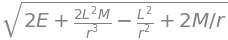

In [ ]:
u_r = sqrt(2*Energy +  2*M/r - L**2/r**2 + 2*M*L**2/r**3)
u_r

In [ ]:
simplify((u_r**2 / f + (L/r**2)**2 * r**2).subs(r_s, 2*M))

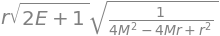

In [ ]:
u_t = sqrt(1/f + (u_r**2)/f**2 + ((L/r**2)**2 * r**2) / f).subs(r_s, 2*M)
cancel(simplify(u_t))

In [ ]:
simplify((-u_t**2 * f + u_r**2 / f + (L/r**2)**2 * r**2 ).subs(r_s,2*M))